In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colormaps as cmaps

In [17]:
def load_df(path):
    df = pd.read_csv(path)
    initial_rows = np.where(df['epoch'] == 0)[0]
    df.drop(index=initial_rows, inplace=True)
    return df

k100_df = load_df("./rep_100_losses_by_epoch.csv")
k250_df = load_df("./rep_250_losses_by_epoch.csv")
k500_df = load_df("./rep_500_losses_by_epoch.csv")
k1000_df = load_df("./rep_1000_losses_by_epoch.csv")
k2500_df = load_df("./rep_2500_losses_by_epoch.csv")
k5000_df = load_df("./rep_5000_losses_by_epoch.csv")
k10000_df = load_df("./rep_10000_losses_by_epoch.csv")

k10000_df.drop(k10000_df[k10000_df['run'] >= 10].index, inplace=True)

k10000_df

,epoch,loss,reconstruction_loss,divergence_loss,stoicheometry_loss,test_loss,test_reconstruction_loss,test_divergence_loss,test_stoicheometry_loss,epochs,...,refresh_data_on,save_losses_on,test_dataset,test_size,save_test_min,weight_decay,beta_S,main_folder,losses_file,run
1,1,3049.101060,2985.260895,63.840156,0.0,3444.998755,3415.373590,29.625171,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
2,2,2633.533370,2573.313810,60.219544,0.0,3353.856255,3323.987835,29.868445,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
3,3,2329.412155,2262.313265,67.098878,0.0,3308.313945,3276.430435,31.883518,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
4,4,2088.188990,2015.671755,72.517222,0.0,3281.203330,3247.178780,34.024526,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
5,5,1901.726840,1827.433365,74.293501,0.0,3264.529670,3229.905095,34.624572,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,27,823.378734,774.918590,48.460147,0.0,3237.116389,3211.977548,25.138847,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,9
252,28,812.645051,764.572998,48.072051,0.0,3241.739392,3216.740010,24.999373,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,9
253,29,798.093232,750.438882,47.654349,0.0,3244.960142,3220.159403,24.800741,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,9
254,30,786.607765,739.308524,47.299244,0.0,3249.637006,3225.000437,24.636586,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,9


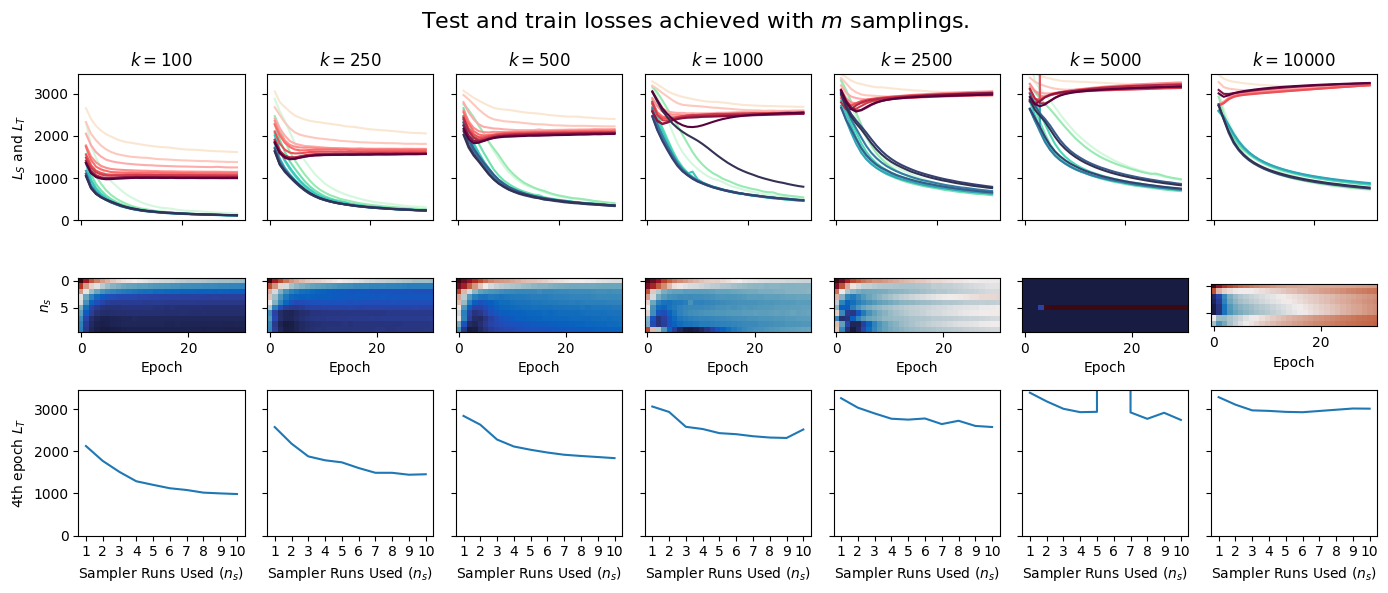

In [21]:
fig, axs = plt.subplots(3, 7, figsize=(14,6))

ax1 = (axs[0,0], axs[1,0], axs[2,0])
ax2 = (axs[0,1], axs[1,1], axs[2,1])
ax3 = (axs[0,2], axs[1,2], axs[2,2])
ax4 = (axs[0,3], axs[1,3], axs[2,3])
ax5 = (axs[0,4], axs[1,4], axs[2,4])
ax6 = (axs[0,5], axs[1,5], axs[2,5])
ax7 = (axs[0,6], axs[1,6], axs[2,6])

max_loss = max([
    df["test_loss"].max()
    for df in [k250_df, k500_df, k2500_df, k10000_df, k10000_df]
])

n_runs = 10

def set_axis(axs):
    axs[0].set_ylabel("$L_S$ and $L_T$")
    axs[1].set_ylabel("$n_{s}$")
    axs[2].set_ylabel(f"4th epoch $L_T$")


def plot(kdf, axs, k, remove_y_ticks=True):
    loss_colors = cmaps.bl_11.discrete(10).colors
    test_colors = list(reversed(cmaps.fushia_red_pink1.discrete(10).colors))

    for run in kdf['run'].unique():
        run_df = kdf[kdf['run'] == run]
        axs[0].plot(run_df['epoch'], run_df["loss"], label=run, color=loss_colors[run])
        axs[0].plot(run_df['epoch'], run_df["test_loss"], label=run, color=test_colors[run])


    axs[0].set_title(f"$k={k}$")
    axs[0].set_ylim([0, max_loss])
    axs[0].tick_params(
        axis='x', 
        labelbottom=False,
    )

    loss_matrix = kdf.set_index(['run', 'epoch'])['test_loss'].unstack().values
    axs[1].imshow(loss_matrix, cmap=cmaps.balance)#, vmin=0, vmax=max_loss)
    axs[1].set_xlabel("Epoch")
    
    epoch4_df = kdf[kdf['epoch'] == 4]
    axs[2].plot(epoch4_df['run'], epoch4_df['test_loss'])
    axs[2].set_ylim([0, max_loss])
    axs[2].set_xlabel("Sampler Runs Used ($n_s$)")
    axs[2].set_xticks([i for i in range(n_runs)])
    axs[2].set_xticklabels([f"{i+1}" for i in range(n_runs)])

    if remove_y_ticks:
        for ax in axs:
            ax.set_yticklabels([])

plot(k100_df, ax1, 100, remove_y_ticks=False)
plot(k250_df, ax2, 250)
plot(k500_df, ax3, 500)
plot(k1000_df, ax4, 1000)
plot(k2500_df, ax5, 2500)
plot(k5000_df, ax6, 5000)
plot(k10000_df, ax7, 10000)

set_axis(ax1)

fig.suptitle("Test and train losses achieved with $m$ samplings.", fontsize=16)
fig.tight_layout()

plt.savefig("./test_losses.png", dpi=400)
plt.show()